<a href="https://colab.research.google.com/github/andersonftdj/data_science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

---






<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Christ_on_Corcovado_mountain.JPG/1200px-Christ_on_Corcovado_mountain.JPG">

Um lugar regado de boas praias, lugares históricos e muitos pontos turísticos o estado do Rio de Janeiro, apesar do seu pouco tamanho, é um local mundialmente conhecido. A sua capital, Rio de Janeiro, conta com as mais famosas praias do mundo como Copacabana e Tijuca e também o Cristo Redentor, considerado pela UNESCO um dos patrimônios da humanidade.

Em contraste com a beleza encontrada por toda sua extensão litorânea, de acordo com o [Anuário Brasileiro de Segurança Pública de 2020](https://forumseguranca.org.br/anuario-brasileiro-seguranca-publica/), o Rio é um dos estados com o maior número de morte em 2020. Poderia ser isso atribuiado a desigualdade social? Concentração de facções? Excesso do uso da força policíal?

<img src="https://ichef.bbci.co.uk/news/640/cpsprodpb/1180A/production/_111409617_mediaitem111409615.jpg">

Não é uma questão trivial conseguir entender as causas que fazem, para tristeza de Gilberto Gil, o *Rio de Janeiro deixar de ser lindo.*





Através das novas leis de acesso à informação, vem sendo disponibilizado dados de diversas fontes de informação. Como exemplos temos o [portal ISPDados](http://www.ispdados.rj.gov.br/estatistica.html) do Rio de Janeiro que fonrece dados sobre crimes catalogados em todo o estado. 

Neste notebook faremos uma análise em cima dos indicadores estatísticos da violência no Rio, exploraremos algumas das variáveis disponíveis buscando entender um pouco mais sobre os tipos de roubos mais praticados, objetos que mais são furtados entre algumas outras ocorrências relatada.

## Obtenção dos dados

<img src="https://image.freepik.com/vetores-gratis/conceito-cms-de-design-plano-ilustrado_23-2148796510.jpg">

Os dados foram obtidos originalmento através do [Instituto de Segurança Pública do  Rio de Janeiro](http://www.ispdados.rj.gov.br/estatistica.html) que cataloga os crimes desde 1991. Foi feito um pré-processamento nos dados pelo professor [Carlos Melo](https://www.instagram.com/carlos_melo.py/), com o fim de facilitar a análise e esse dataset pode ser baixado diretamente [aqui](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

Os dados são catalogados a partir de Registros de Ocorrência feito em delegacias da Polícia Civíl do Estado do Rio de Janeiro, e também com informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

## Importando os dados

<img src="https://image.freepik.com/vetores-gratis/ferramentas-de-instrumentos-de-reparacao-de-construcao-de-carpintaria-com-composicao-de-caderno-em-fundo-escuro-de-madeira_1284-12259.jpg">

Para nossa análise usaremos as bibliotecas:
* Pandas para a leitura do arquivo csv.
* matplotlib para a plotagem dos gráficos.

Nesta primeira etapa, também aproveitaremos para definir algumas configurações de gráficos para melhorar a experiência de visualização dos dados nas etapas seguintes.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


df_original = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")
df = df_original[['vano', 'mes', 'furto_veiculos', 'roubo_veiculo', 'recuperacao_veiculos', 'hom_doloso', 'roubo_em_coletivo', 'roubo_celular']]
# configurando gráficos 
# plt.style.use("ggplot")
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

## Análise Inicial dos Dados

<img src= "https://image.freepik.com/vetores-gratis/pessoas-minusculas-testando-a-garantia-de-qualidade-em-ilustracao-vetorial-plana-de-software-isolado-personagem-de-desenho-animado-corrigindo-bugs-no-dispositivo-de-hardware-teste-de-aplicativo-e-conceito-de-servico-de-ti_74855-10172.jpg">

Antes de inicar a análise, precisamos entender algumas questões básicas sobre o dataset como a **quantidade de dados e variáveis**, os **tipo de variáveis** e os **valores ausentes**. Para começar a entender melhor, vamos verificar a dimensão do dataset.

In [78]:
print("Entradas: ", df_original.shape[0])
print("Variáveis: ", df_original.shape[1])

Entradas:  344
Variáveis:  56


Sabendo das dimensões, vamos verificar agora quais são as variáveis disponíveis no nosso conjunto de dados para termos uma noção do problema.

In [79]:
df_original.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Com a noção do tamanho do dataset e das variáveis disponíveis, vamos entender que tipo  de informação cada variável fornece.

Essas informações podem ser úteis para direcionarmos nosso trabalho na fase de limpeza de dados.



In [80]:
df_original.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Agora que estamos conscientes da estrutura do conjunto de dados que temos em mãos, vamo ver as 5 primeiras e 5 últimas linhas do dataset.

In [81]:
df_original.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [82]:
df_original.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


É possível reparar através das variáveis `ano`e `mes` que o nosso dataset está organizado de modo sequencial no tempo, com o início em 1991.

Há uma grande quantidade de dados ausentes, principalmente no início dos registros. Podemos levantar algumas hipóteses quanto a isso:
1. Na época, as variáveis que estão nulas, provavelmente não existiam. Por exemplo, roubo de celular. Em 1991 ter uma celular era inacessível para a maior parte da população, então como roubos eram raros provavelmente eles poderiam estar sendo indexado em outra variável, ou nem mesmo registrados.

2. Outra hipótese a se pensar é que simplesmente pode ter havido erros na hora de registrar esses dados, perdidos em uma digitalização ou alguém pode ter esquecido, por que não?



Antes de tratar essas hipótes, vamos conferir a quantidade de valores ausentes contidos nesse dataset.


In [83]:
(df_original.isnull().sum() / df_original.shape[0]  * 100).sort_values(ascending=False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Algumas variáveis tem um número considerável de dados ausentes, como roubo e furto de bicicleta, apreensão de drogas entre outros.

Com um grande número de informações ausentes, devemos buscar algum meio para que isso não afete nossa análise. Pelo fato dos nossos dados estarem dispostos de maneira sequencial no tempo, podemos escolher analisá-los a partir de um ano em que uma variável começou a ser catalogada para ter um resultado mais condizente com a realidade.

Podemos também encarar esse problema e analisarmos os dados das seguinte maneiras:

* Número anual de crimes
* Número mensal de crimes
* Categoria de crimes (Contra o Patrimônio, Contra a Vida e etc.)




In [84]:
(df_original.groupby(['vano']).sum()).roubo_celular

vano
1991        0.0
1992        0.0
1993        0.0
1994        0.0
1995        0.0
1996        0.0
1997        0.0
1998        0.0
1999        0.0
2000     2120.0
2001    15937.0
2002    13472.0
2003    12760.0
2004    11084.0
2005     6913.0
2006     7962.0
2007     7592.0
2008     8614.0
2009     8499.0
2010     6988.0
2011     5391.0
2012     4362.0
2013     5465.0
2014     7758.0
2015    12038.0
2016    19549.0
2017    24380.0
2018    26538.0
2019    18660.0
Name: roubo_celular, dtype: float64

 A primeiro ocorrência de roubo de celular aconte em 2000, portanto usaremos esse ano para seguir com as análises.

In [85]:
df = df[ df['vano'] >= 2000]


**Analisaremos os dados a partir do ano de 2000.**

## Informações estatísticas da violência no Rio de Janeiro

<img src="https://image.freepik.com/fotos-gratis/conta-de-papel-no-local-de-trabalho-do-projeto-de-financas-do-encontro_1418-62.jpg">

Para entender melhor a disposição estatística dos dados numéricos utilizaremos o método `describe`.

Através dele podemos obter informações que podem nos ajudar a:
* Entender a distribuição dados.
* Obter resumos estatísticos.
* Identificar outliers.
* Verificar a eficácia de uma limpeza em dados tratados e não tratados. 


In [86]:
df.describe()

,vano,mes,furto_veiculos,roubo_veiculo,recuperacao_veiculos,hom_doloso,roubo_em_coletivo,roubo_celular
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,2009.338983,6.432203,1549.326271,2696.330508,2091.059322,457.847458,748.250000,957.974576
std,5.691682,3.445574,202.198321,803.812342,525.703489,88.401225,314.756564,624.309034
min,2000.000000,1.000000,1159.000000,1413.000000,1188.000000,272.000000,303.000000,0.000000
25%,2004.000000,3.000000,1381.750000,2225.500000,1735.750000,381.750000,520.000000,549.750000
50%,2009.000000,6.000000,1521.000000,2555.500000,2037.500000,462.500000,693.000000,717.500000
75%,2014.000000,9.000000,1723.000000,3056.000000,2381.500000,527.250000,853.000000,1306.750000
max,2019.000000,12.000000,2041.000000,5358.000000,3695.000000,682.000000,1628.000000,2626.000000


### Crimes contra o Patrimônio -  Veículos

<img src="https://image.freepik.com/vetores-gratis/icone-de-carro-isometrico-isolado-no-branco_107791-128.jpg">

Crimes contra o patrimônio são considerados aqueles que envolvem prejuizo financeiro para a vítima. Esses são um dos crimes mais comuns nas grandes capitais e nesta seção entenderemos um pouco mais sobre a realidade de furtos a veiculos no Rio de Janeiro. São 3 variáveis que envolvem veículos:

* `roubo_veiculo`
* `furto_veiculos`
* `recuperacao_veiculos`






In [87]:
media_furto_veiculo =  df.furto_veiculos.mean()
print("Média de Furto de veículos por mês: ", round(media_furto_veiculo,2))

Média de Furto de veículos por mês:  1549.33


Furto é um crime onde um bem é extraído sem a presença da vítima, e como podemos ver há uma média de **1549 carros que são furtados por mês.**

In [88]:
media_roubo_veiculo = df.roubo_veiculo.mean()
print("Média de Roubo de veículos por mês: ",round(media_roubo_veiculo, 2))

Média de Roubo de veículos por mês:  2696.33


Já o roubo é um crime onde há ameaça e violência com a vítima. Para esse cenário temos em média **2696 carros sendo roubados por mês.**

Gráficamente podemos ver o comparativo de Roubo e Furtos.

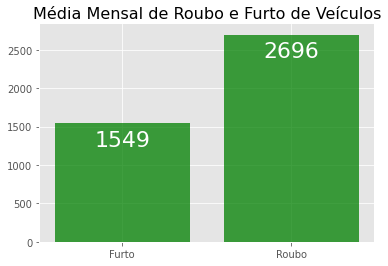

In [89]:
x = np.arange(2)

plt.title( 'Média Mensal de Roubo e Furto de Veículos', loc='center', fontsize=16)
plt.bar(x, height=[df.furto_veiculos.mean(), df.roubo_veiculo.mean()], color='green', alpha=0.75)
plt.xticks(x, ('Furto', 'Roubo'))
plt.annotate('{:.0f}'.format(media_furto_veiculo), xy=(0,1250), xycoords='data', fontsize=22, horizontalalignment='center', color='white')
plt.annotate('{:.0f}'.format(media_roubo_veiculo), xy=(1,2400), xycoords='data', fontsize=22, horizontalalignment='center', color='white')
plt.show()


Como temos também a variável `recuperação_veiculos` podemos calcular a porcentagem de carros que são recuperados após o roubo e o furto usando a seguinte fórmula:

  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}} *100 $



In [90]:
media_recuperacao_veiculo = df.recuperacao_veiculos.mean()
print(round(media_recuperacao_veiculo,2))

porcentagem_recuperada = media_recuperacao_veiculo / (media_furto_veiculo + media_roubo_veiculo) *  100
print('Porcentagem de veiculos recuparedos:' , round(porcentagem_recuperada,2), '%')

2091.06
Porcentagem de veiculos recuparedos: 49.25 %


Como podemos ver acima, dos carro roubados **49.25% são recuperados pela polícia.**

### Crimes contra a Vida

Temos a variável `hom_doloso` que descreve as mortes que foram intencionais, para este crime a pena é de 6 a 20 anos de prisão. 
Para essa variável consultaremos a quantidade mínima, média e máxima de registros no período observado. 
 
 

In [91]:
media_hom_doloso = df.hom_doloso.mean()
min_hom_doloso = df.hom_doloso.min()
max_hom_doloso = df.hom_doloso.max()
print("\tHomicídio doloso")
print("Mínimo:", min_hom_doloso)
print("Média :", round(media_hom_doloso,2))
print("Máximo:", max_hom_doloso)

	Homicídio doloso
Mínimo: 272
Média : 457.85
Máximo: 682


Dados os resultados de mínima e máxima podemos nos aprofundar um pouco mais para entender melhor esses resultados.

In [92]:
df[ df.hom_doloso == min_hom_doloso]

,vano,mes,furto_veiculos,roubo_veiculo,recuperacao_veiculos,hom_doloso,roubo_em_coletivo,roubo_celular
293,2015,6,1333,2254,1768,272,619,896.0


In [93]:
df[ df.hom_doloso == max_hom_doloso]

,vano,mes,furto_veiculos,roubo_veiculo,recuperacao_veiculos,hom_doloso,roubo_em_coletivo,roubo_celular
170,2005,3,1811,3056,2459,682,811,553.0


De toda a base histórica que estamos analisando, isto é, desde 2000, a menor quantidade de homícios contabilizados foi em junho de 2015 com 272 mortos e maior quantidade foi em março de 2005, totalizando  682, e na média geral são contabilizados 457 novos homicídios por mês!

## Visualização de Dados 
<img src="https://img.freepik.com/vetores-gratis/grafico-de-barras-colorido-ascendente-em-3d-em-uma-tela-de-toque-de-tablet-que-descreve-analises-on-line-moveis-com-uma-ilustracao-vetorial-de-modelo-de-caixa-de-texto_1284-43089.jpg?size=338&ext=jpg"> 

A visualização dos dados é uma das partes de uma análise que possibilita de maneira mais clara entender como os dados se comportam, para isso analisaremos os homicídios dolosos através do histograma para entender como a distribuição dos dados se comportam.

 Um histograma é uma poderosa ferramenta de visualização que nos permite enxergar a distribuição dos dados. Em seu eixo x ela é divida em alguns intervalos, já no eixo y é representado a quantidade absoluta de ocorrência dessas classes.

In [94]:
mpl.rcParams['axes.spines.left'] = False


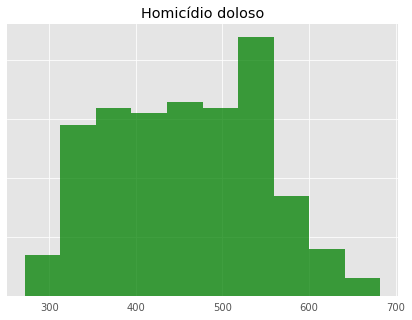

In [95]:
plt.figure(figsize=(7,5))
plt.title("Homicídio doloso")
plt.hist(df.hom_doloso, facecolor='g', alpha=0.75)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True, left=False, labelleft = False)
plt.show();

Alguns pontos interessantes que o gráfico nos mostra:
* Houveram por volta de 45 meses em que foram registrandos 550 Homicídios dolosos.
* Houveram menos de 10 meses em que estava a baixo dos 300 registros de Homicídio doloso.

O gráfico de linhas é outra ótima ferramenta que pode nos ajudar a visualisar os acontecimentos em uma linha do tempo. 

In [96]:
mpl.rcParams['axes.spines.left'] = True
plt.style.use("ggplot")

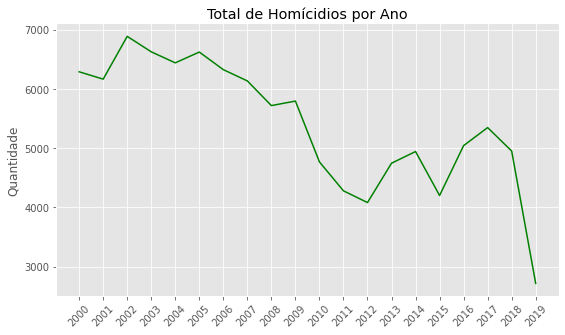

In [97]:
plt.figure(figsize=(9,5))
plt.title("Total de Homícidios por Ano")
plt.plot((df.groupby(['vano']).sum())['hom_doloso'], 'g');
plt.xticks(ticks= df.vano.unique(), rotation=45 )
plt.ylabel("Quantidade")
plt.show();

Podemos observar como a taxa de homicídios anual estava alta no início dos anos 2000 e como caiu drásticamente em 2019. A quantidade é a menor histórica dos últimos 19 anos. 

Podemos agrupar as nossas informações por meses para saber se há algum mês específico em que os relatos deste crime aumenta.

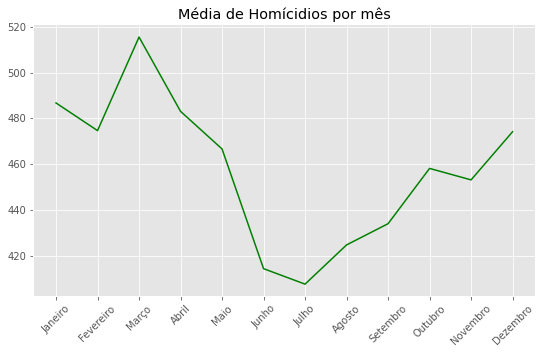

In [98]:
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto','Setembro','Outubro','Novembro','Dezembro']

plt.figure(figsize=(9,5))
plt.title("Média de Homícidios por mês")
plt.plot( df.groupby('mes').mean()['hom_doloso'], 'g')
plt.xticks([x+1 for x in range( len(meses) )], meses, rotation=45)
plt.show();

Segundo a média mensal de homicídios podemos observar através desse agrupamento que os meses de Março e Julho são os meses que tem respectivamente a maior e menor quantidade deste tipo de relato.

Agora, e quanto aos **roubos em coletivos?** A realidade é que a maioria dos brasileiros enfrentam cada vez mais horas e horas em coletivos todos os dias, indo e voltando do trabalho. Será que com o passar do tempo, esse tipo de crime aumentou ou diminuiu no Rio de Janeiro?

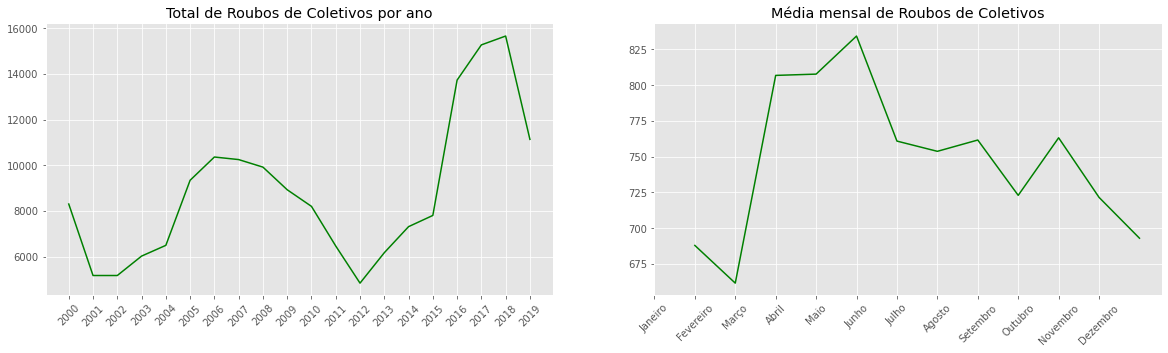

In [99]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.plot(df.groupby(['vano']).sum().roubo_em_coletivo, 'g')
ax1.set(title="Total de Roubos de Coletivos por ano")
ax1.set_xticks([ x+(df.vano.unique()[0] ) for x in range( len(df.vano.unique()) ) ])
ax1.set_xticklabels(df.vano.unique(), rotation=45)

ax2.plot( df.groupby(['mes']).mean().roubo_em_coletivo, 'g' ) 
ax2.set( title="Média mensal de Roubos de Coletivos" )
ax2.set_xticks( [x for x in range( len(df.mes.unique()) )] )
ax2.set_xticklabels( meses, rotation=45 )

plt.show()

Com pouco mais de 8000 relatos anuais no início do século XXI e por volta de 16000 no penúltimo ano registrado podemos afirmar que este tipo de crime **tem aumentado vertiginosamente**, ainda mais considerando que este valor atual é o maior de todos os tempos! O Mês que há um pico de relatos é no mês de junho.

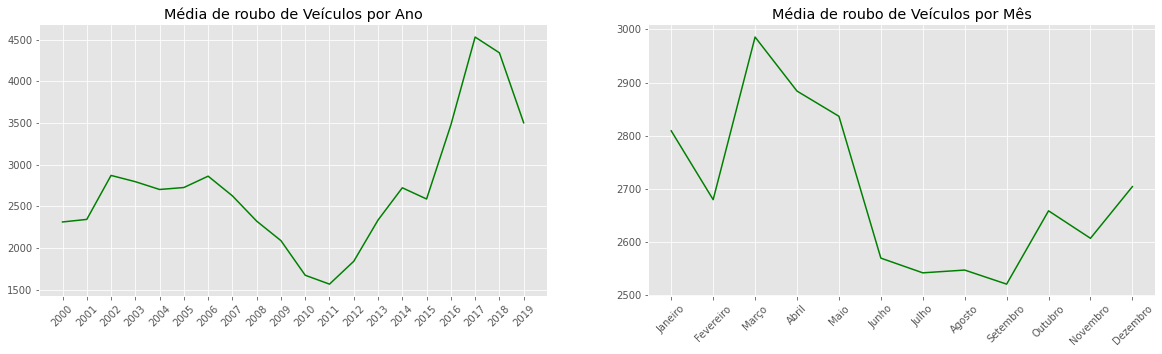

In [100]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.plot(df.groupby(['vano']).mean().roubo_veiculo, 'g')
ax1.set(title="Média de roubo de Veículos por Ano")
ax1.set_xticks( [x+df.vano.unique()[0] for x in range( len( df.vano.unique() ) )] )
ax1.set_xticklabels( df.vano.unique(), rotation=45)

ax2.plot(df.groupby(['mes']).mean().roubo_veiculo, 'g')
ax2.set(title="Média de roubo de Veículos por Mês")
ax2.set_xticks([x+1 for x in range( len( df.mes.unique() ) )])
ax2.set_xticklabels(meses, rotation=45)

plt.show()

Para os roubos a veículos o aumento também é fácilmente detectado e embora em relação ao útilmo ano tenha caido um pouco, no geral ainda esta maior que no início do século. Outro fator interessante que podemos observar é que o mês do ano onde há o maior número dessa ocorrência é no mês de março.

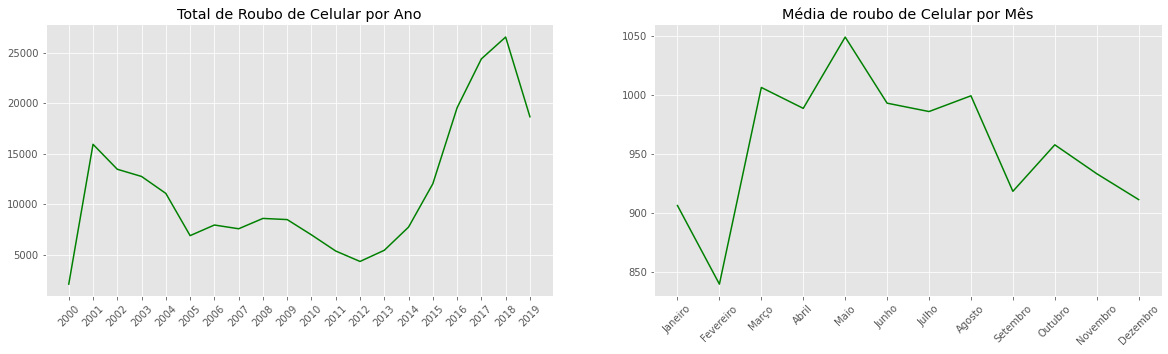

In [101]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.plot(df.groupby(['vano']).sum().roubo_celular, 'g')
ax1.set(title="Total de Roubo de Celular por Ano")
ax1.set_xticks( [x+df.vano.unique()[0] for x in range( len( df.vano.unique() ) )] )
ax1.set_xticklabels( df.vano.unique(), rotation=45)

ax2.plot(df.groupby(['mes']).mean().roubo_celular, 'g')
ax2.set(title="Média de roubo de Celular por Mês")
ax2.set_xticks([x+1 for x in range( len( df.mes.unique() ) )])
ax2.set_xticklabels(meses, rotation=45)

plt.show()

Outra variável que é interessante de se observar é o roubo de celulares, esse tipo de roubo cresceu absurdamente nos últimos tempos! O mês de Maio é o preferido pelos ladrões para esse tipo de crime.

Muito se deve a popularização dos aparelhos vendidos no Brasil. Onde antes dos anos 2000 não haviam sequer registros desses crimes, hoje alcança sua marca histórica.

---



## Conclusão

Embora o Rio de Janeiro tenha ótimos lugares turísticos para se visitar, não é um dos locais mais calmos e seguros do mundo.

Através deste notebook foi possível constatar que a maioria dos crimes que envolvem roubo ou furto contra patrimonio ou a coletivo apresentaram um aumento no número de registros. Se por um lado temos uma tristeza, por outro lado, os homocídios apresentaram uma queda expressiva desde o início dos anos 2000.

Saber interpretar informações estatíticas, analisar hipóteses e agrupar dados com fim de construir uma visualização são tarefas úteis que agregam muito em uma análise exploratória de dados e aqui ela pode ser bem exercitada.

Pudemos perceber de maneira prática que a etapa de aquisição, tratamento e análise de dados são fases importantes que devemos despreender um bom tempo neste processo afim de trazer uma maior qualidade para as próximas etapas de um projeto. 


 